In [66]:
from fastai.imports import *
np.set_printoptions(linewidth=130)

In [67]:
path = Path('../input/playground-series-s3e2')
df = pd.read_csv(path/'train.csv')
tst_df = pd.read_csv(path/'test.csv')

In [68]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [69]:
def proc_data(df):
    df['log_avg_glucose_level'] = np.log1p(df['avg_glucose_level'])
    df['gender'] = pd.Categorical(df.gender)
    df['ever_married'] = pd.Categorical(df.ever_married)
    df['work_type'] = pd.Categorical(df.work_type)
    df['Residence_type'] = pd.Categorical(df.Residence_type)
    df['smoking_status'] = pd.Categorical(df.smoking_status)
    
proc_data(df)
proc_data(tst_df)

In [70]:
cats=["gender","ever_married","work_type","Residence_type","smoking_status"]
conts=['id', 'age', 'hypertension', 'heart_disease', 'log_avg_glucose_level', 'bmi']
dep="stroke"

In [71]:
df.gender.head()

0      Male
1      Male
2    Female
3      Male
4    Female
Name: gender, dtype: category
Categories (3, object): ['Female', 'Male', 'Other']

In [72]:
df.gender.cat.codes.head()

0    1
1    1
2    0
3    1
4    0
dtype: int8

[Text(0.5, 1.0, 'Histogram')]

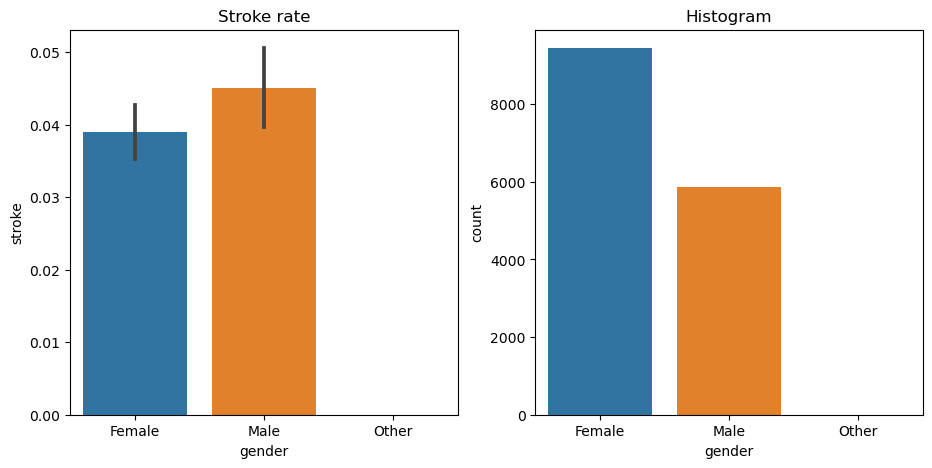

In [73]:
import seaborn as sns

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=df, y=dep, x ="gender", ax=axs[0]).set(title="Stroke rate")
sns.countplot(data=df, x="gender", ax=axs[1]).set(title="Histogram")

In [74]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

In [75]:
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

In [76]:
preds = val_xs.gender==1

In [77]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, preds)

0.3975431259801359

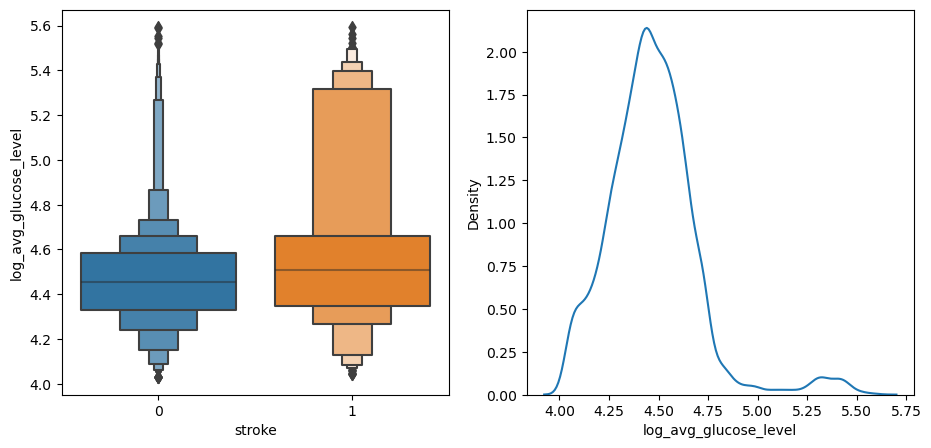

In [78]:
df_logAvgGlucoseLevel = trn_df[trn_df.log_avg_glucose_level>0]
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.boxenplot(data=df_logAvgGlucoseLevel, x=dep, y="log_avg_glucose_level", ax=axs[0])
sns.kdeplot(data=df_logAvgGlucoseLevel, x="log_avg_glucose_level", ax=axs[1]);

In [79]:
preds = val_xs.log_avg_glucose_level>4.5

In [80]:
mean_absolute_error(val_y, preds)

0.41531625718766335

In [81]:
def _side_score(side, y):
    tot = side.sum()
    if tot<=1: return 0
    return y[side].std()*tot

In [82]:
def score(col, y, split):
    lhs = col<=split
    return (_side_score(lhs,y) + _side_score(~lhs,y))/len(y)

In [83]:
score(trn_xs["gender"], trn_y, 0.5)

0.1986560124890052

In [84]:
score(trn_xs["log_avg_glucose_level"], trn_y, 4.5)

0.19788379664149747

In [85]:
def iscore(nm, split):
    col = trn_xs[nm]
    return score(col, trn_y, split)
from ipywidgets import interact
interact(nm=conts, split=15.5)(iscore);

interactive(children=(Dropdown(description='nm', options=('id', 'age', 'hypertension', 'heart_disease', 'log_a…

In [86]:
interact(nm=cats,split=2)(iscore);

interactive(children=(Dropdown(description='nm', options=('gender', 'ever_married', 'work_type', 'Residence_ty…

In [87]:
nm = "age"
col = trn_xs[nm]
unq = col.unique()
unq.sort()
unq

array([8.00e-02, 1.60e-01, 2.40e-01, 3.20e-01, 4.00e-01, 4.80e-01, 5.60e-01, 6.40e-01, 6.80e-01, 7.20e-01, 8.00e-01, 8.80e-01,
       1.00e+00, 1.08e+00, 1.16e+00, 1.24e+00, 1.32e+00, 1.40e+00, 1.48e+00, 1.56e+00, 1.64e+00, 1.72e+00, 1.80e+00, 1.88e+00,
       2.00e+00, 3.00e+00, 4.00e+00, 5.00e+00, 6.00e+00, 7.00e+00, 8.00e+00, 9.00e+00, 1.00e+01, 1.10e+01, 1.20e+01, 1.30e+01,
       1.40e+01, 1.50e+01, 1.60e+01, 1.70e+01, 1.80e+01, 1.90e+01, 2.00e+01, 2.10e+01, 2.20e+01, 2.30e+01, 2.40e+01, 2.50e+01,
       2.60e+01, 2.70e+01, 2.80e+01, 2.90e+01, 3.00e+01, 3.10e+01, 3.20e+01, 3.30e+01, 3.40e+01, 3.50e+01, 3.60e+01, 3.70e+01,
       3.80e+01, 3.90e+01, 4.00e+01, 4.10e+01, 4.20e+01, 4.30e+01, 4.40e+01, 4.50e+01, 4.60e+01, 4.70e+01, 4.80e+01, 4.90e+01,
       5.00e+01, 5.10e+01, 5.20e+01, 5.30e+01, 5.40e+01, 5.50e+01, 5.60e+01, 5.70e+01, 5.80e+01, 5.90e+01, 6.00e+01, 6.10e+01,
       6.20e+01, 6.30e+01, 6.40e+01, 6.50e+01, 6.60e+01, 6.70e+01, 6.80e+01, 6.90e+01, 7.00e+01, 7.10e+01, 7.20

In [88]:
scores = np.array([score(col, trn_y, o) for o in unq if not np.isnan(o)])
unq[scores.argmin()]

50.0

In [89]:
def min_col(df, nm):
    col,y = df[nm], df[dep]
    unq = col.dropna().unique()
    scores = np.array([score(col, y, o) for o in unq if not np.isnan(o)])
    idx = scores.argmin()
    return unq[idx],scores[idx]

min_col(trn_df, "age")

(50.0, 0.15388503117205457)

In [90]:
cols = cats+conts
{o:min_col(trn_df, o) for o in cols}

{'gender': (0, 0.1986560124890052),
 'ever_married': (0, 0.18655185640821714),
 'work_type': (3, 0.18767987277486026),
 'Residence_type': (1, 0.19878256616578863),
 'smoking_status': (0, 0.19671023967172568),
 'id': (4112, 0.1984845291129224),
 'age': (50.0, 0.15388503117205457),
 'hypertension': (0, 0.1918432419985707),
 'heart_disease': (0, 0.19593054972339183),
 'log_avg_glucose_level': (5.130785895226717, 0.19080611630745709),
 'bmi': (19.3, 0.19296631759149233)}

In [91]:
cols.remove("gender")
ismale = trn_df.gender==1
males,females = trn_df[ismale],trn_df[~ismale]

In [92]:
{o:min_col(males, o) for o in cols}

{'ever_married': (0, 0.18310413222493063),
 'work_type': (3, 0.19307069335311242),
 'Residence_type': (0, 0.20717408070221305),
 'smoking_status': (0, 0.20246159122840104),
 'id': (154, 0.2061018799243831),
 'age': (51.0, 0.16024402251918057),
 'hypertension': (0, 0.19999602757434987),
 'heart_disease': (0, 0.20453239655505256),
 'log_avg_glucose_level': (5.109997857950446, 0.19737641141234913),
 'bmi': (21.7, 0.19871579629402625)}

In [93]:
{o:min_col(females, o) for o in cols}

{'ever_married': (0, 0.1859607568013191),
 'work_type': (3, 0.18232345807102468),
 'Residence_type': (0, 0.1933671348271428),
 'smoking_status': (0, 0.1924614911842022),
 'id': (6639, 0.19292620377574543),
 'age': (45.0, 0.14833443768587937),
 'hypertension': (0, 0.18669081805803703),
 'heart_disease': (0, 0.19047421983024387),
 'log_avg_glucose_level': (5.087225896257968, 0.1866765589782701),
 'bmi': (19.4, 0.18581248470082723)}

In [94]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y);

In [95]:
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True, special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size = {size}; ratio={ratio}', s))

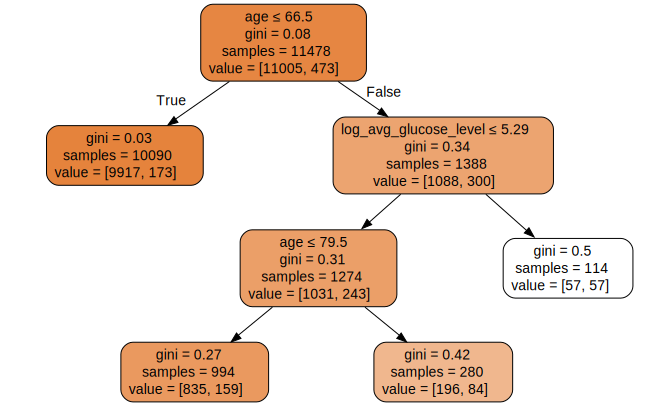

In [96]:
draw_tree(m, trn_xs, size=10)

In [97]:
def gini(cond):
    act = df.loc[cond, dep]
    return 1 - act.mean()**2 - (1-act).mean()**2

In [98]:
gini(df.gender=='Female'), gini(df.gender=='Male'), gini(df.gender=='Other')

(0.07488108184754472, 0.08608516055745419, 0.0)

In [99]:
mean_absolute_error(val_y, m.predict(val_xs))

0.04155776267642446

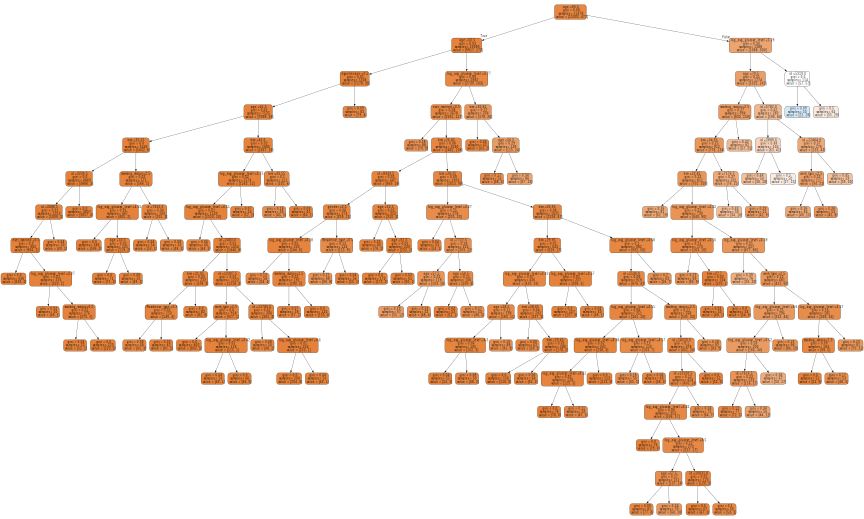

In [100]:
m = DecisionTreeClassifier(min_samples_leaf=50)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=12)

In [101]:
mean_absolute_error(val_y, m.predict(val_xs))

0.04077365394668061

In [102]:
tst_df[cats] = tst_df[cats].apply(lambda x: x.cat.codes)
tst_xs,_ = xs_y(tst_df)

def subm(preds, suff):
    tst_df['stroke'] = preds
    sub_df = tst_df[['id','stroke']]
    sub_df.to_csv(f'sub-{suff}.csv', index=False)

subm(m.predict(tst_xs), 'tree')

In [103]:
def get_tree(prop=0.75):
    n = len(trn_y)
    idxs = random.choice(n, int(n*prop))
    return DecisionTreeClassifier(min_samples_leaf=5).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])

In [104]:
trees = [get_tree() for t in range(100)]

In [106]:
all_probs = [t.predict(val_xs) for t in trees]
avg_probs = np.stack(all_probs).mean(0)

mean_absolute_error(val_y, avg_probs)

0.0596131730266597

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf=5)
rf.fit(trn_xs, trn_y);
mean_absolute_error(val_y, rf.predict(val_xs))

0.04208050182958704

In [108]:
subm(rf.predict(tst_xs), 'rf')

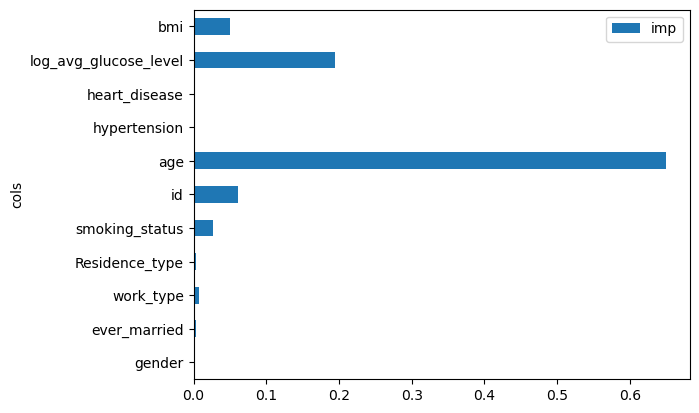

In [109]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=m.feature_importances_)).plot('cols', 'imp', 'barh');

In [110]:
import joblib

joblib.dump(rf, 'model.pkl')

base_item = val_xs.mode().iloc[0]
joblib.dump(base_item, 'base_item.pkl')

['base_item.pkl']